![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

In [54]:
from typing import Callable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, Birch, AffinityPropagation, MiniBatchKMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [27]:
df = pd.read_csv('datasets/iris.csv',
                      skiprows=1,
                      names = ['sepal-length',
                               'sepal-width',
                               'petal-length',
                               'petal-width',
                               'class'])

In [28]:
df = df.sample(frac=1).reset_index(drop=True)

In [29]:
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
70,5.8,2.7,5.1,1.9,Iris-virginica
123,6.1,3.0,4.6,1.4,Iris-versicolor
77,5.8,2.8,5.1,2.4,Iris-virginica
134,7.2,3.6,6.1,2.5,Iris-virginica
117,5.3,3.7,1.5,0.2,Iris-setosa
146,5.4,3.0,4.5,1.5,Iris-versicolor
126,6.4,3.2,4.5,1.5,Iris-versicolor
56,6.3,2.5,5.0,1.9,Iris-virginica
125,5.1,2.5,3.0,1.1,Iris-versicolor
85,6.2,2.9,4.3,1.3,Iris-versicolor


In [30]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

In [31]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.sample(5)

,sepal-length,sepal-width,petal-length,petal-width,class
22,6.4,2.8,5.6,2.2,2
17,4.3,3.0,1.1,0.1,0
126,6.0,3.0,4.8,1.8,2
37,6.1,3.0,4.9,1.8,2
49,6.5,3.0,5.2,2.0,2


In [8]:
iris_features = df.drop('class', axis=1)
iris_features

,sepal-length,sepal-width,petal-length,petal-width
0,4.8,3.1,1.6,0.2
1,5.1,3.5,1.4,0.3
2,6.7,3.3,5.7,2.1
3,6.3,2.8,5.1,1.5
4,7.3,2.9,6.3,1.8
...,...,...,...,...
145,7.7,3.0,6.1,2.3
146,6.7,3.0,5.0,1.7
147,6.9,3.1,5.1,2.3
148,6.9,3.1,4.9,1.5


In [32]:
iris_features = df.drop('class', axis=1).values
iris_features

array([[5.5, 3.5, 1.3, 0.2],
       [6.4, 3.2, 5.3, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.3, 2.8, 5.1, 1.5],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3.3, 5.7, 2.5],
       [7. , 3.2, 4.7, 1.4],
       [6.7, 3.3, 5.7, 2.1],
       [6.7, 3.1, 5.6, 2.4],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 2.7, 3.9, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.8, 4.9, 2. ],
       [6.9, 3.1, 5.4, 2.1],
       [5. , 3.4, 1.6, 0.4],
       [6.5, 3. , 5.5, 1.8],
       [6. , 2.2, 4. , 1. ],
       [4.4, 3.2, 1.3, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.6, 2.7, 4.2, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.5, 2.6, 4.4, 1.2],
       [6. , 2.2, 5. , 1.5],
       [5.7, 3.8, 1.7, 0.3],
       [4.8, 3.4, 1.9, 0.2],
       [7.7, 2.8, 6.7, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.9, 3.2, 4.8, 1.8],
       [5.6, 2

In [33]:
iris_labels = df['class'].values
iris_labels

array([0, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1,
       0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 0, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 1, 2,
       2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0,
       2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0,
       1, 1, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 1])

In [34]:
def k_means(
        data: np.ndarray,
        n_clusters: int = 3,
        max_iter: int = 1000,
        random_state: int | None = 42
) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError('data must be a numpy ndarray')

    return KMeans(
        n_clusters=n_clusters,
        max_iter=max_iter,
        random_state=random_state,
        n_init='auto'
    ).fit(data)

In [35]:
ClusteringModel = KMeans | AgglomerativeClustering | DBSCAN | MeanShift | Birch | AffinityPropagation | MiniBatchKMeans

In [36]:
def evaluate_clustering_model(
        clustering_model: Callable[[np.ndarray, ...], object],
        data: np.ndarray,
        labels_true: np.ndarray
):

    model = clustering_model(data)
    labels_pred = model.labels_

    homogeneity = metrics.homogeneity_score(labels_true, labels_pred)
    completeness = metrics.completeness_score(labels_true, labels_pred)
    v_measure = metrics.v_measure_score(labels_true, labels_pred)
    ari = metrics.adjusted_rand_score(labels_true, labels_pred)
    ami = metrics.adjusted_mutual_info_score(labels_true, labels_pred)

    unique_labels = np.unique(labels_pred)

    if len(unique_labels) > 1:
        silhouette = metrics.silhouette_score(data, labels_pred)
    else:
        silhouette = np.nan

    metrics_dict = {
        "homogeneity": homogeneity,
        "completeness": completeness,
        "v_measure": v_measure,
        "ARI": ari,
        "AMI": ami,
        "silhouette": silhouette,
    }

    header = "homog\tcompl\tv-meas\tARI\tAMI\tsilhouette"
    print(header)
    print("-" * len(header.expandtabs()))
    print(
        "{homogeneity:.3f}\t{completeness:.3f}\t{v_measure:.3f}\t"
        "{ARI:.3f}\t{AMI:.3f}\t{silhouette:.3f}".format(**metrics_dict)
    )

    return metrics_dict

In [37]:
evaluate_clustering_model(k_means, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.751	0.765	0.758	0.730	0.755	0.553


{'homogeneity': 0.7514854021988338,
 'completeness': 0.7649861514489815,
 'v_measure': 0.7581756800057784,
 'ARI': 0.7302382722834697,
 'AMI': 0.7551191675800484,
 'silhouette': 0.5525919445499757}

# MiniBatchKMeans

- fast version KMeans for the large datasets.
- Huge data, big data, streaming and when the KMeans is too slow.

In [38]:
def mini_batch_k_means(data: np.ndarray, n_cluster: int = 3, max_iter: int = 1000) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError()

    return MiniBatchKMeans(
        n_clusters=n_cluster,
        max_iter=max_iter,
        batch_size=20
    ).fit(data)

In [39]:
evaluate_clustering_model(mini_batch_k_means, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.778	0.804	0.791	0.732	0.788	0.554


{'homogeneity': 0.7781768659513969,
 'completeness': 0.80358854062315,
 'v_measure': 0.7906785790830967,
 'ARI': 0.7322981167185344,
 'AMI': 0.7880116792998709,
 'silhouette': 0.554140356924275}

# AgglomerativeClustering
- bottom-up hierarchical clustering
- not require rounded shapes
- full structure hierarchy
- good as a exploration method
- computational complexity n3

In [42]:
def agglomerative_clustering(data: np.ndarray, n_cluster: int = 3) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError('data must be a numpy ndarray.')

    return AgglomerativeClustering(n_clusters=n_cluster).fit(data)

In [43]:
evaluate_clustering_model(agglomerative_clustering, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.761	0.780	0.770	0.731	0.767	0.554


{'homogeneity': 0.7608008469718723,
 'completeness': 0.7795958005591144,
 'v_measure': 0.7700836616487869,
 'ARI': 0.7311985567707746,
 'AMI': 0.7671669615713111,
 'silhouette': 0.5540972908150553}

# DBSCAN

- based on density
- points in dense areas are clusters , isolate points are noise
- very good to irregular shapes
- resilient for outliers
- no need numbers clusters
- can make detection anomalies

In [46]:
np.log(150)

np.float64(5.0106352940962555)

In [44]:
def dbscan(data: np.ndarray, eps: float = 0.45, min_samples: int = 4) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError('data must be a numpy ndarray.')

    return DBSCAN(eps=eps, min_samples=min_samples).fit(data)

In [45]:
evaluate_clustering_model(dbscan, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.577	0.609	0.593	0.508	0.584	0.372


{'homogeneity': 0.5773205947971476,
 'completeness': 0.6093983666695363,
 'v_measure': 0.5929259393972258,
 'ARI': 0.5084974632998321,
 'AMI': 0.5842965531192642,
 'silhouette': 0.37208250029643425}

# MeanShift

- density based
- don't need put number of clusters
- independently detects local data density maxima
- works with irregular shapes
- bandwidth can count by KDE - Kernel Density Estimation

In [48]:
def mean_shift(data: np.ndarray, bandwidth: float = 0.85) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError('data must be a numpy ndarray.')

    return MeanShift(bandwidth=bandwidth).fit(data)

In [49]:
evaluate_clustering_model(mean_shift, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.760	0.772	0.766	0.744	0.763	0.551


{'homogeneity': 0.7603645798041669,
 'completeness': 0.7717917344958113,
 'v_measure': 0.7660355440487252,
 'ARI': 0.7436826319432358,
 'AMI': 0.7630831275245811,
 'silhouette': 0.5509296349732906}

# Birch ( Balanced Iterative Reducing And Clustering Using Hierarchies )

- the bast apply to millions of records
- compress data online to tree-structure (CF tree), after that clustering compressed representation
- irregular shape of data BAD
- rounded shape of data VERY GOOD
- doesn't cope well with noise

In [50]:
def birch(data: np.ndarray, n_clusters: int = 3) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError("Data must be a numpy ndarray.")

    return Birch(n_clusters=n_clusters).fit(data)

In [51]:
evaluate_clustering_model(birch, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.635	0.792	0.705	0.566	0.700	0.534


{'homogeneity': 0.6348349886259617,
 'completeness': 0.7915254996344554,
 'v_measure': 0.7045737535402855,
 'ARI': 0.5658856060268795,
 'AMI': 0.7003531848694737,
 'silhouette': 0.5337725811733872}

# AffinityPropagation

- it doesn't need a cluster list
- this selects representative points (exemplars)

In [52]:
def affinity_propagation(data: np.ndarray, damping: float = 0.6, max_iter: int = 1000) -> object:
    if not isinstance(data, np.ndarray):
        raise TypeError('data must be a numpy ndarray.')

    return AffinityPropagation(damping=damping, max_iter=max_iter, preference=-50).fit(data)

In [53]:
evaluate_clustering_model(affinity_propagation, iris_features, iris_labels)

homog	compl	v-meas	ARI	AMI	silhouette
--------------------------------------------------
0.787	0.809	0.798	0.746	0.795	0.555


{'homogeneity': 0.7869234996582516,
 'completeness': 0.8093691546872487,
 'v_measure': 0.797988521701332,
 'ARI': 0.7455038681804481,
 'AMI': 0.7954205025674188,
 'silhouette': 0.5550802152744264}

In [57]:
def plot_affinity_propagation_on_iris(
    damping: float = 0.6,
    max_iter: int = 1000,
    figsize: tuple[int, int] = (8, 6),
    dpi: int = 120,
) -> None:
    """Clustering Iris with AffinityPropagation and visualizing exemplars in PCA(2D) space."""

    iris = load_iris()
    X = iris.data
    y = iris.target
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    ap = AffinityPropagation(damping=damping, max_iter=max_iter, random_state=42, preference=-50)
    ap.fit(X_scaled)

    labels = ap.labels_
    cluster_centers_indices = ap.cluster_centers_indices_
    n_clusters = len(cluster_centers_indices)

    print(f"Number of clusters found (AffinityPropagation): {n_clusters}")


    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)


    centers_pca = X_pca[cluster_centers_indices]


    plt.figure(figsize=figsize, dpi=dpi)


    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=labels,
        cmap="tab10",
        s=40,
        alpha=0.8,
        edgecolor="k",
        linewidth=0.3,
        label="Points",
    )


    plt.scatter(
        centers_pca[:, 0],
        centers_pca[:, 1],
        marker="*",
        s=300,
        c="red",
        edgecolor="white",
        linewidth=1.5,
        label="Exemplars (cluster centers)",
    )

    for idx, (cx, cy) in enumerate(centers_pca):
        plt.annotate(
            f"C{idx}",
            (cx, cy),
            textcoords="offset points",
            xytext=(0, 8),
            ha="center",
            fontsize=9,
            fontweight="bold",
        )

    plt.title("AffinityPropagation na Iris (PCA 2D)", fontsize=13, fontweight="bold")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

Number of clusters found (AffinityPropagation): 3


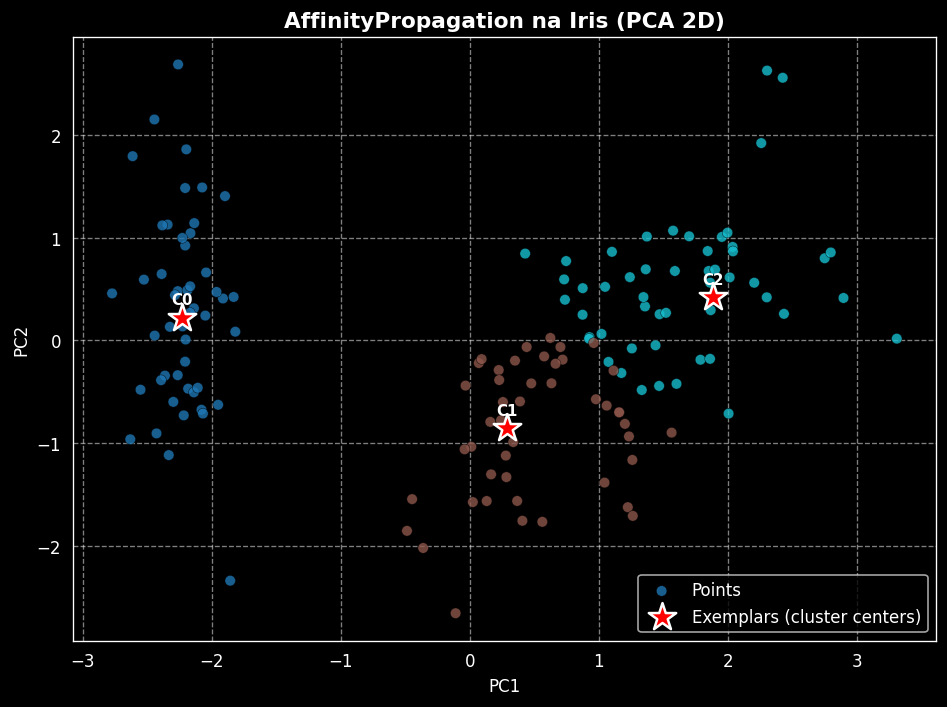

In [58]:
plot_affinity_propagation_on_iris()

Number of clusters found (AffinityPropagation): 2


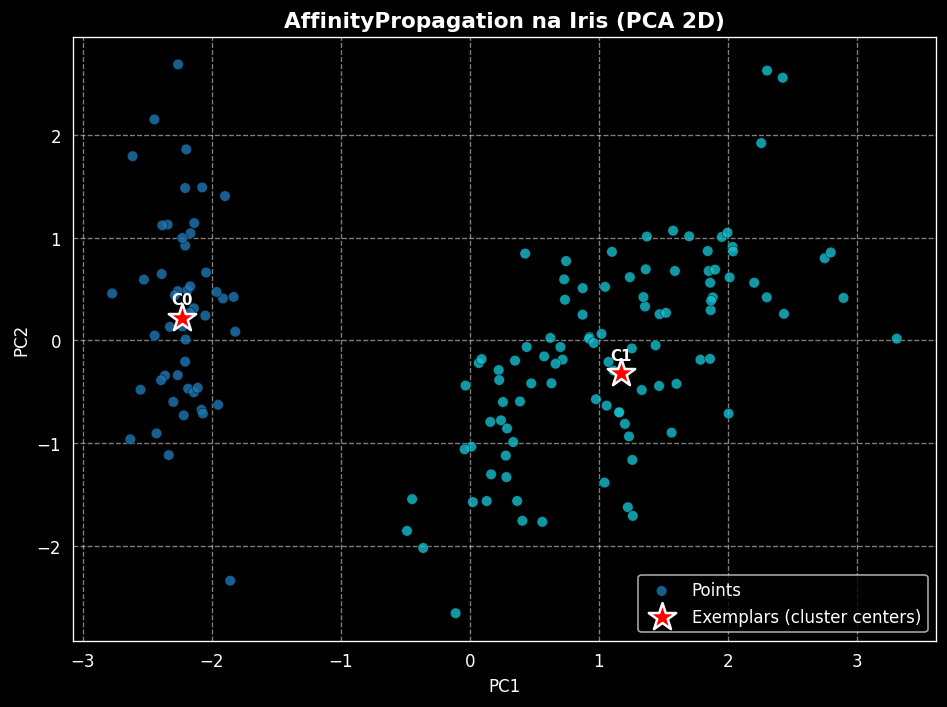

In [62]:
plot_affinity_propagation_on_iris(damping=0.99)